#Importing Libraries

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
import joblib

#Data Preprocessing

**Load the dataset**

In [2]:
# Load dataset
df = pd.read_csv("balanced_synthetic_network_data.csv")

**Check the shape of the dataset**

In [3]:
df.shape

(4000, 15)

**Check the columns**

In [4]:
df.columns

Index(['Device_ID', 'Packet_Size (bytes)', 'Latency (ms)', 'Throughput (Mbps)',
       'Protocol_Type', 'Source_Port', 'Destination_Port', 'IP_Flag',
       'Connection_Duration (ms)', 'Packet_Count', 'Error_Rate',
       'Fragmentation_Flag', 'Payload_Size (bytes)', 'Session_Status',
       'Attack_Type'],
      dtype='object')

**Check for null values**

In [5]:
df.isnull().sum()

,0
Device_ID,0
Packet_Size (bytes),0
Latency (ms),0
Throughput (Mbps),0
Protocol_Type,0
Source_Port,0
Destination_Port,0
IP_Flag,580
Connection_Duration (ms),0
Packet_Count,0


there is no null values in our dataset




**Check for Duplicate values**

In [6]:
print(f"Duplicate Rows: {df.duplicated().sum()}")

Duplicate Rows: 0


there is no duplicate values also in our dataset

In [8]:
target_feature = "Attack_Type"
print(df[target_feature].value_counts())

Attack_Type
DDoS        1000
Normal      1000
Phishing    1000
Spoofing    1000
Name: count, dtype: int64


**Label Encoding**

In [10]:
# Encode categorical features and target
categorical_features = ["Device_ID", "Protocol_Type", "IP_Flag", "Session_Status"]
target_feature = "Attack_Type"

In [12]:
# Label encode categorical features
label_encoders = {}
for col in categorical_features + [target_feature]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

**Correlation Analysis**

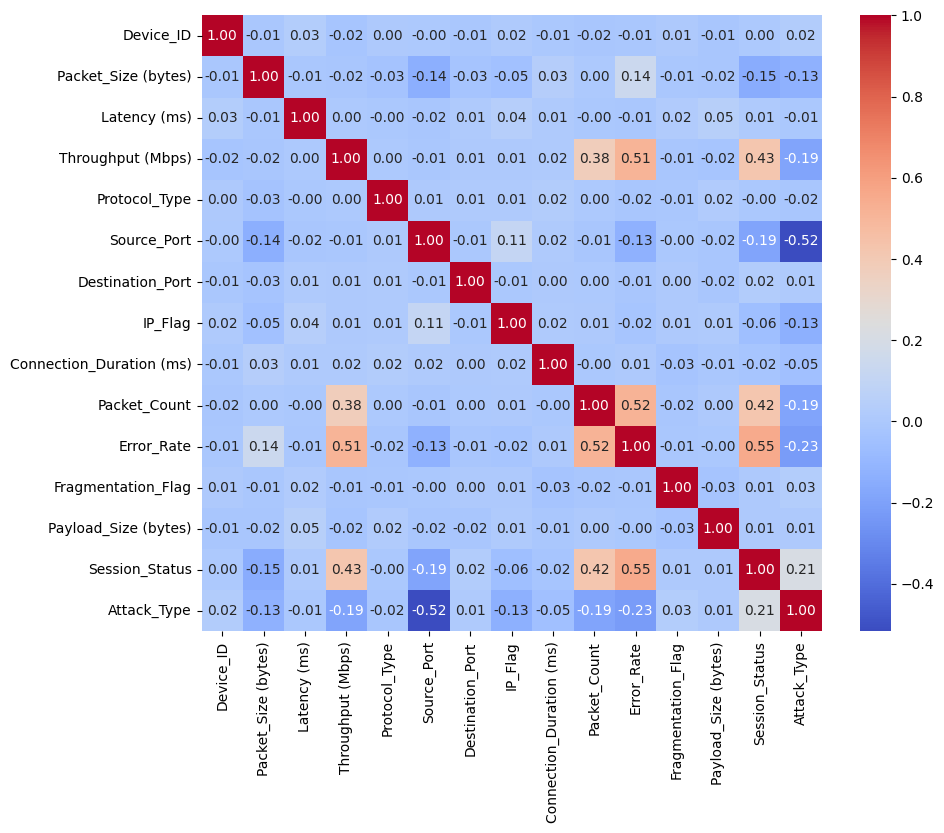

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [14]:
plt.savefig('correlation_heatmap.png')

<Figure size 640x480 with 0 Axes>

**Separate features and target**

In [17]:
# Separate features and target
X = df.drop(columns=[target_feature])
y = df[target_feature]

**Scaling**

In [18]:
# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
joblib.dump(scaler, "scaler.pkl")
print("Scaler saved as scaler.pkl")

Scaler saved as scaler.pkl


In [20]:
# Save LabelEncoders
joblib.dump(label_encoders, "label_encoders.pkl")
print("LabelEncoders saved as label_encoders.pkl")

LabelEncoders saved as label_encoders.pkl


In [22]:
# Save preprocessed data
np.save("X.npy", X)
np.save("y.npy", y)